# Training notebook

In [1]:
import utils
import model

In [2]:
# set dataset to use
dataset_name = 'facades'

In [3]:
# instantiate datasets and dataloaders
datasets = {mode: utils.ImageDataset(dataset_name = dataset_name, transform=utils.data_transforms[mode], mode = mode) for mode in ['train', 'val']}
dataloaders = {mode: utils.DataLoader(datasets[mode], batch_size=1, shuffle=True) for mode in ['train', 'val']}

In [4]:
# instantiate model
p2p = model.Pix2Pix().to(utils.device)

In [5]:
# utils.train(model = p2p, n_epochs = 1, dataloader = dataloaders['train'])

In [6]:
input, real = next(iter(dataloaders['val']))

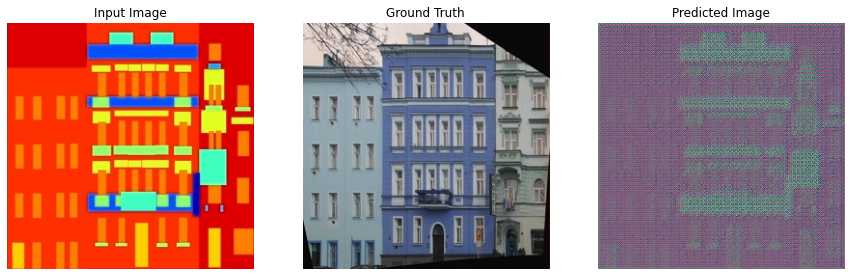

In [7]:
utils.generate_images(model = p2p, input = input, real = real)

In [9]:
prediction = p2p.generator(input.to(utils.device))

(array([67024., 26910.,  8885.,  6398.,  9244.,  4710.,  2321.,  5283.,
        17592., 48241.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

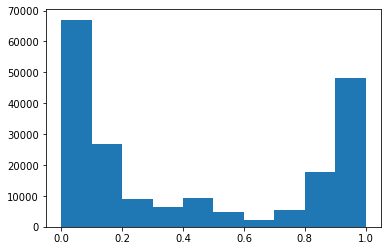

In [21]:
utils.plt.hist(0.5 * input[0].detach().cpu().numpy().flatten() + 0.5)

(array([15571.,  6795., 14398., 29395., 27719., 35844., 41945., 15114.,
         6704.,  3123.]),
 array([0.        , 0.09647059, 0.19294117, 0.28941175, 0.38588235,
        0.48235294, 0.5788235 , 0.6752941 , 0.7717647 , 0.8682353 ,
        0.9647059 ], dtype=float32),
 <BarContainer object of 10 artists>)

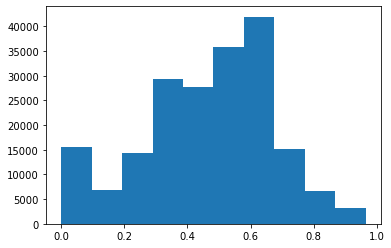

In [22]:
utils.plt.hist(0.5 * real[0].detach().cpu().numpy().flatten() + 0.5)

(array([  464.,  4406., 21876., 61823., 56902., 20357., 15163., 13344.,
         2189.,    84.]),
 array([0.06217968, 0.14994515, 0.23771062, 0.32547608, 0.41324157,
        0.501007  , 0.5887725 , 0.67653793, 0.76430345, 0.8520689 ,
        0.93983436], dtype=float32),
 <BarContainer object of 10 artists>)

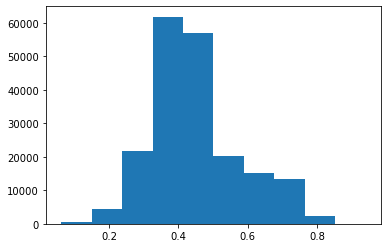

In [20]:
utils.plt.hist(0.5 * prediction[0].detach().cpu().numpy().flatten() + 0.5)